# Exploratory Data Analysis (EDA) Image Analysis 

## Emotion Face Classifier Notebook 3

Focuses on showing example expressions and aggregrate representations of emotion categories.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [4]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [5]:
from utils.image_processing import (
    plot_facial_expressions,
    generate_sample_images
)

In [6]:
# from utils.image_processing import (
#     display_sample_images,
#     preprocess_images,
#     compute_average_face,
#     save_and_plot_images,
#     apply_pca,
#     apply_nmf,
#     run_decomposition_on_categories,
#     visualize_decomposition_results
# )

In [7]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [8]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,slategray
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,sienna


In [9]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
# print_json(common_dicts)

In [10]:
# Get subset of emo-color mappings
color_dict = common_dicts['plotly_styles']['Training']['color']
color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [11]:
emo_samples = generate_sample_images(fer2013, n=5, cat_col='emotion', path_col='img_path')

In [12]:
emo_samples

{'Angry': ['data/Testing/Neutral/Neutral-78.jpg',
  'data/Training/Angry/Angry-3777.jpg',
  'data/Training/Neutral/Neutral-1707.jpg',
  'data/Training/Neutral/Neutral-3794.jpg',
  'data/Testing/Angry/Angry-699.jpg'],
 'Fear': ['data/Training/Angry/Angry-2917.jpg',
  'data/Testing/Neutral/Neutral-758.jpg',
  'data/Training/Sad/Sad-4276.jpg',
  'data/Training/Happy/Happy-2049.jpg',
  'data/Training/Surprise/Surprise-124.jpg'],
 'Sad': ['data/Testing/Sad/Sad-858.jpg',
  'data/Training/Happy/Happy-2739.jpg',
  'data/Training/Happy/Happy-6252.jpg',
  'data/Training/Neutral/Neutral-761.jpg',
  'data/Training/Neutral/Neutral-2297.jpg'],
 'Neutral': ['data/Testing/Angry/Angry-627.jpg',
  'data/Training/Fear/Fear-3764.jpg',
  'data/Training/Happy/Happy-5149.jpg',
  'data/Training/Happy/Happy-5862.jpg',
  'data/Training/Happy/Happy-3584.jpg'],
 'Happy': ['data/Training/Sad/Sad-4057.jpg',
  'data/Training/Sad/Sad-235.jpg',
  'data/Training/Fear/Fear-3833.jpg',
  'data/Training/Angry/Angry-1495.jp

Plot saved to test_examples.png/facial_expressions.png


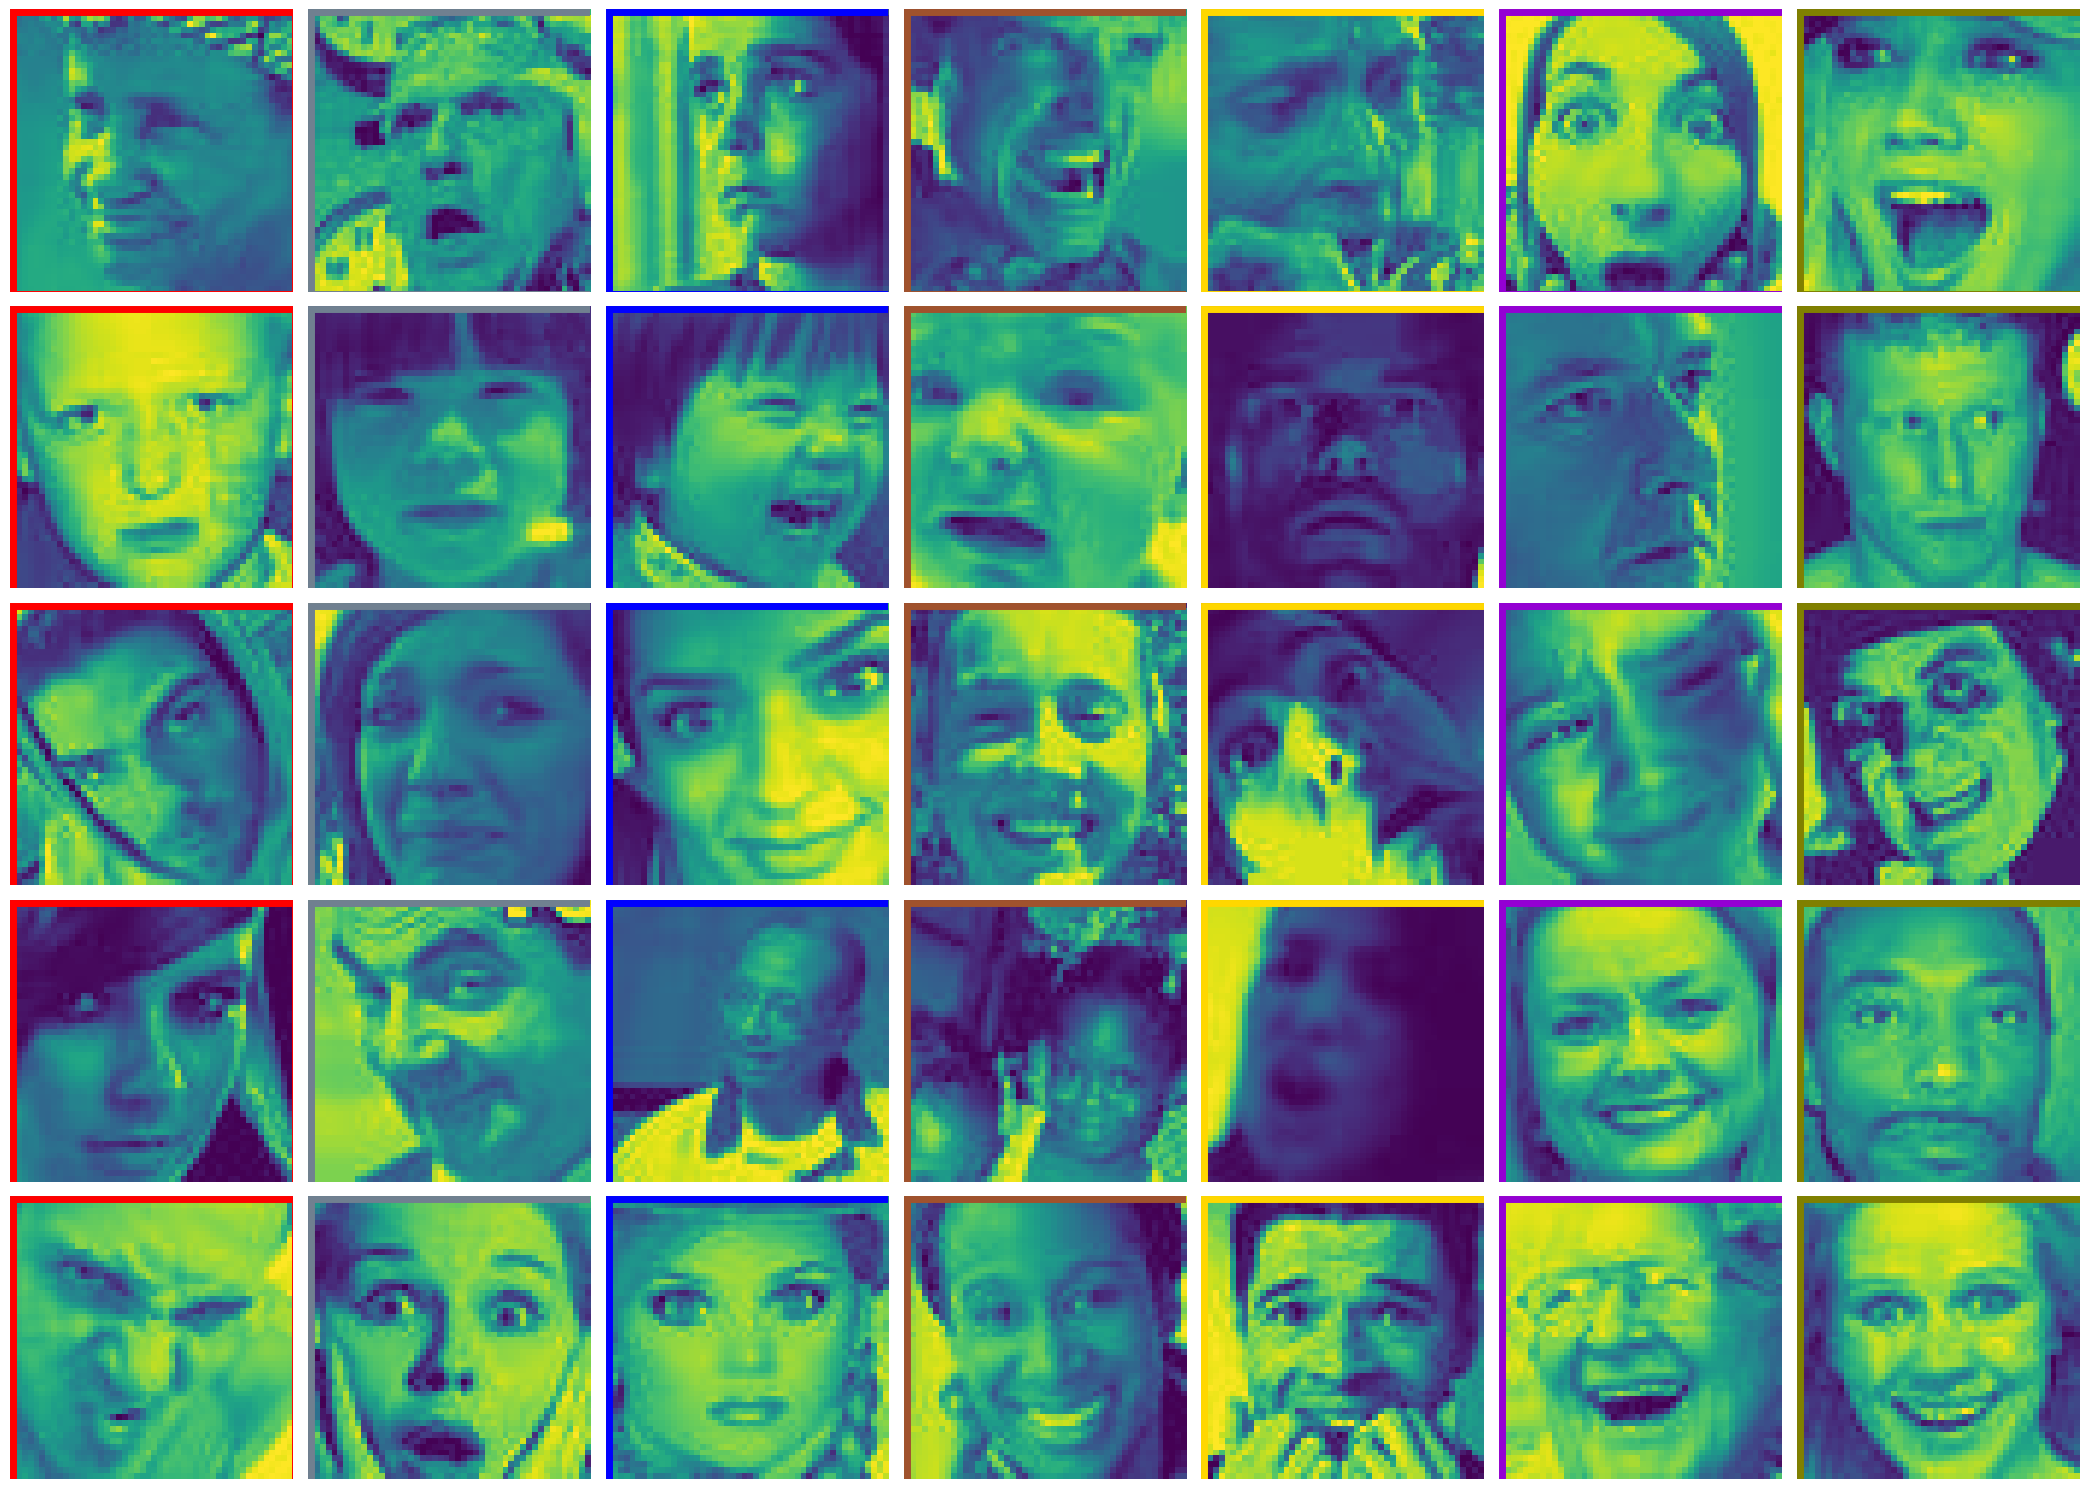

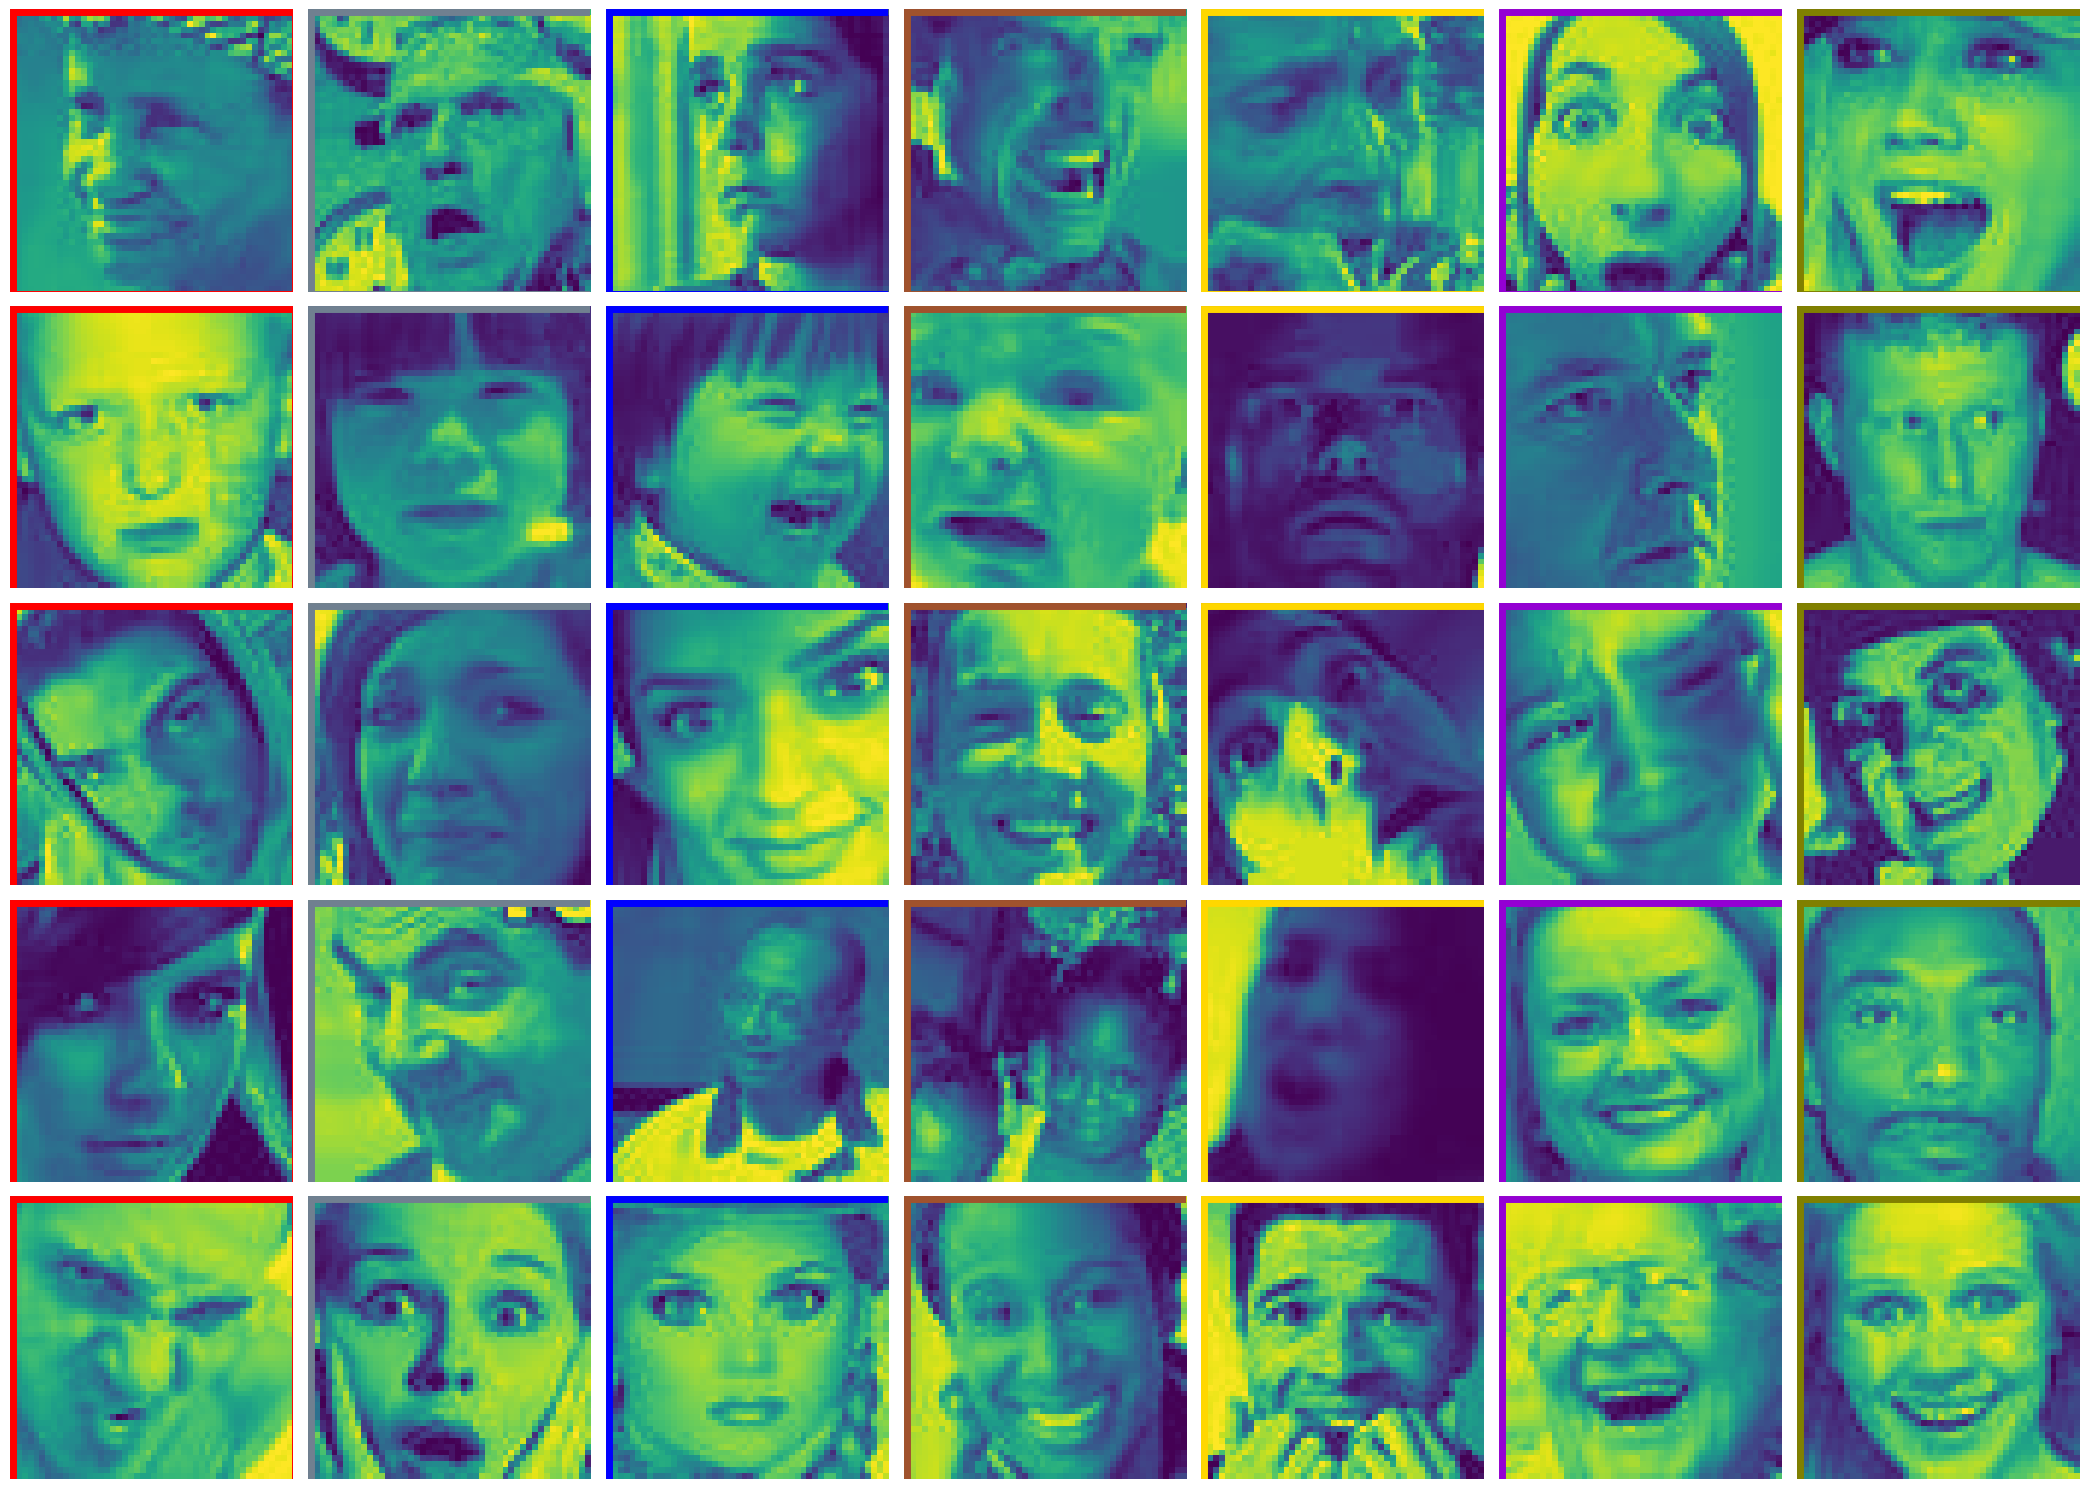

In [13]:
plot_facial_expressions(
    image_dict=emo_samples, 
    row_labels=None, 
    label_colors=color_dict, 
    save_path='test_examples.png',
    file_name=None 
)

In [ ]:
example_imgs_fig = plot_facial_expressions(
    image_dict=emo_samples, 
    row_labels=None, 
    label_colors=None, 
    save_path=None, 
    columns=5
)

In [ ]:
# Display sample unaltered images from each emotion category with colored outlines
display_sample_images(fer2013, n_rows=3, save_path='imgs/sample_images.png')

In [ ]:
# Preprocess data
X_train, y_train = preprocess_images(fer2013, usage='Training')

In [ ]:
# Compute average faces, with the combined face prepended to the list
average_faces, labels = compute_average_face(X_train, y_train)

In [ ]:
# Get the label colors from the dataframe
label_colors = ['black'] + list(fer2013.groupby('emotion')['color'].first())  # Add 'black' for the 'Combined' face

In [ ]:
# Save and plot average faces with larger titles and optional color coordination
save_and_plot_images(
    image_list=average_faces, 
    labels=labels, 
    save_path='imgs/average_faces',
    title="Average Face", 
    label_colors=label_colors,  # Pass the list of colors
    use_colors=True  # Set this to True to test color-coordinated titles
)

In [ ]:
# Run PCA decomposition
pca_results = run_decomposition_on_categories(X_train, y_train, fer2013, apply_pca)

# Visualize PCA results
visualize_decomposition_results(pca_results, fer2013, [1, 5, 10, 50], title="PCA Comparison Across Emotions")

In [ ]:
# # Run NMF decomposition
# nmf_results = run_decomposition_on_categories(X_train, y_train, fer2013, apply_nmf)

# # Visualize NMF results
# visualize_decomposition_results(nmf_results, fer2013, [1, 5, 10, 50], title="NMF Comparison Across Emotions")